In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from os import read
data = pd.read_csv('Bicycle_Thefts_Open_Data.csv')
print(data)

                  X             Y  OBJECTID EVENT_UNIQUE_ID  \
0     -8.843627e+06  5.409539e+06         1  GO-20141261431   
1     -8.838280e+06  5.409890e+06         2  GO-20141263544   
2     -8.840400e+06  5.413056e+06         3  GO-20141263784   
3     -8.838091e+06  5.410320e+06         4  GO-20149000090   
4     -8.835848e+06  5.414098e+06         5  GO-20149000071   
...             ...           ...       ...             ...   
34285 -8.836299e+06  5.410361e+06     34286  GO-20232267483   
34286 -8.832492e+06  5.413488e+06     34287  GO-20239048944   
34287 -8.839466e+06  5.413924e+06     34288  GO-20239048939   
34288 -8.822364e+06  5.424439e+06     34289  GO-20239049061   
34289 -8.834923e+06  5.426271e+06     34290  GO-20232278820   

             PRIMARY_OFFENCE                OCC_DATE  OCC_YEAR  OCC_MONTH  \
0                THEFT UNDER  2014/01/01 05:00:00+00      2014    January   
1                        B&E  2013/12/26 05:00:00+00      2013   December   
2           

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

              X             Y  OBJECTID EVENT_UNIQUE_ID   PRIMARY_OFFENCE  \
0 -8.843627e+06  5.409539e+06         1  GO-20141261431       THEFT UNDER   
1 -8.838280e+06  5.409890e+06         2  GO-20141263544               B&E   
2 -8.840400e+06  5.413056e+06         3  GO-20141263784  PROPERTY - FOUND   
3 -8.838091e+06  5.410320e+06         4  GO-20149000090       THEFT UNDER   
4 -8.835848e+06  5.414098e+06         5  GO-20149000071       THEFT UNDER   

                 OCC_DATE  OCC_YEAR OCC_MONTH    OCC_DOW  OCC_DAY  ...  \
0  2014/01/01 05:00:00+00      2014   January  Wednesday        1  ...   
1  2013/12/26 05:00:00+00      2013  December   Thursday       26  ...   
2  2014/01/01 05:00:00+00      2014   January  Wednesday        1  ...   
3  2014/01/01 05:00:00+00      2014   January  Wednesday        1  ...   
4  2013/12/25 05:00:00+00      2013  December  Wednesday       25  ...   

   BIKE_SPEED  BIKE_COLOUR BIKE_COST     STATUS HOOD_158  \
0        10.0          NaN      

In [ ]:
print(data.isnull().sum())
data['BIKE_TYPE'].fillna('Unknown', inplace=True)


X                        0
Y                        0
OBJECTID                 0
EVENT_UNIQUE_ID          0
PRIMARY_OFFENCE          0
OCC_DATE                 0
OCC_YEAR                 0
OCC_MONTH                0
OCC_DOW                  0
OCC_DAY                  0
OCC_DOY                  0
OCC_HOUR                 0
REPORT_DATE              0
REPORT_YEAR              0
REPORT_MONTH             0
REPORT_DOW               0
REPORT_DAY               0
REPORT_DOY               0
REPORT_HOUR              0
DIVISION                 0
LOCATION_TYPE            0
PREMISES_TYPE            0
BIKE_MAKE              169
BIKE_MODEL           12860
BIKE_TYPE                0
BIKE_SPEED             381
BIKE_COLOUR           2952
BIKE_COST             2335
STATUS                   0
HOOD_158                 0
NEIGHBOURHOOD_158        0
HOOD_140                 0
NEIGHBOURHOOD_140        0
LONG_WGS84               0
LAT_WGS84                0
dtype: int64


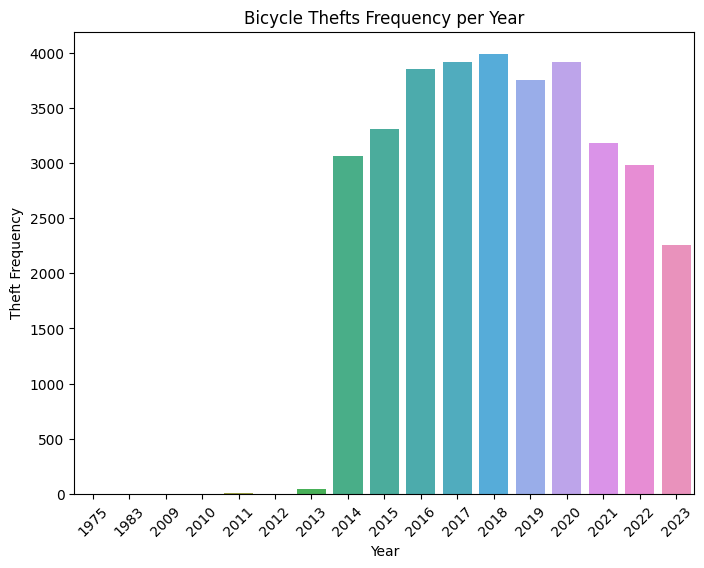

In [ ]:
# Theft frequency per year
plt.figure(figsize=(8, 6))
sns.countplot(x='OCC_YEAR', data=data)
plt.title('Bicycle Thefts Frequency per Year')
plt.xlabel('Year')
plt.ylabel('Theft Frequency')
plt.xticks(rotation=45)
plt.show()

Analysis:

The count plot displays the frequency of bicycle thefts per year.
Observes a fluctuating trend in bicycle thefts over the years and then less from 2020.

Conclusions:

There's variation in theft incidents across different years.
Identification of potential patterns or trends in bicycle theft occurrences.

Recommendations:
Further investigate factors contributing to the fluctuations in different years.
Implement targeted preventive measures based on yearly trends.


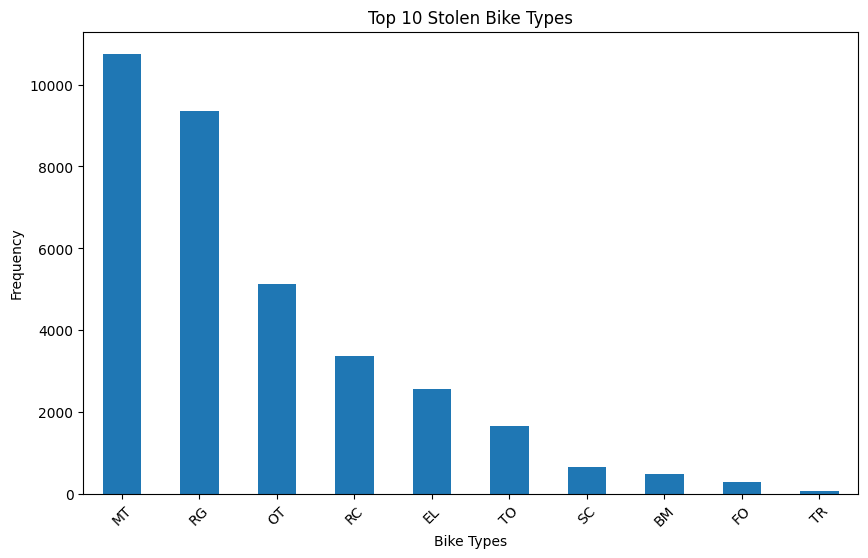

<ipython-input-26-109ad768d184>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['PRICE_RANGE'] = pd.cut(top_10_data['BIKE_COST'], bins=bins, labels=labels)


<Figure size 1200x800 with 0 Axes>

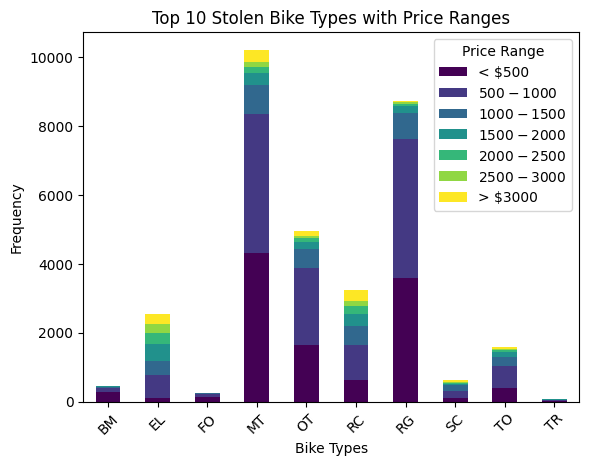

In [ ]:
plt.figure(figsize=(10, 6))
top_bike_types = data['BIKE_TYPE'].value_counts().head(10)
top_bike_types.plot(kind='bar')
plt.title('Top 10 Stolen Bike Types')
plt.xlabel('Bike Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

data['BIKE_COST'].fillna(data['BIKE_COST'].mean(), inplace=True)

# Identify the top 10 stolen bike types
top_10_bike_types = data['BIKE_TYPE'].value_counts().head(10).index.tolist()

# Filter data for the top 10 stolen bike types
top_10_data = data[data['BIKE_TYPE'].isin(top_10_bike_types)]

# Create a new column to categorize bike prices into different ranges (bins)
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = ['< $500', '$500 - $1000', '$1000 - $1500', '$1500 - $2000', '$2000 - $2500', '$2500 - $3000', '> $3000']
top_10_data['PRICE_RANGE'] = pd.cut(top_10_data['BIKE_COST'], bins=bins, labels=labels)

# Count occurrences of each bike type within each price range
bike_type_price_counts = top_10_data.groupby(['BIKE_TYPE', 'PRICE_RANGE']).size().unstack().fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
bike_type_price_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Top 10 Stolen Bike Types with Price Ranges')
plt.xlabel('Bike Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Price Range')
plt.show()

Top 10 Stolen Bike Types: The stacked bar plot illustrates the frequency distribution of the top 10 stolen bike types categorized by price ranges. Each bar represents a bike type, segmented into different colors according to the price ranges.
Observations:
Bike Type Frequency: Certain bike types, like "MOUNTAIN BIKE" and "ROAD BIKE," are more frequently stolen compared to others in the top 10.
Price Range Segmentation: Across bike types, lower-priced bikes (below $1000) seem to be more susceptible to theft.
Insights:
High-Frequency Types: "MOUNTAIN BIKE" and "ROAD BIKE" are commonly stolen, suggesting a higher demand for these types in the stolen bike market.
Price Influence: Lower-priced bikes appear to be targeted more, possibly due to their higher availability or lower security measures.
Recommendations:
Security Measures: Emphasize security measures for commonly stolen bike types to deter theft incidents.
Awareness Campaigns: Educate bike owners, especially those with lower-priced bikes, about better security practices to safeguard against theft.


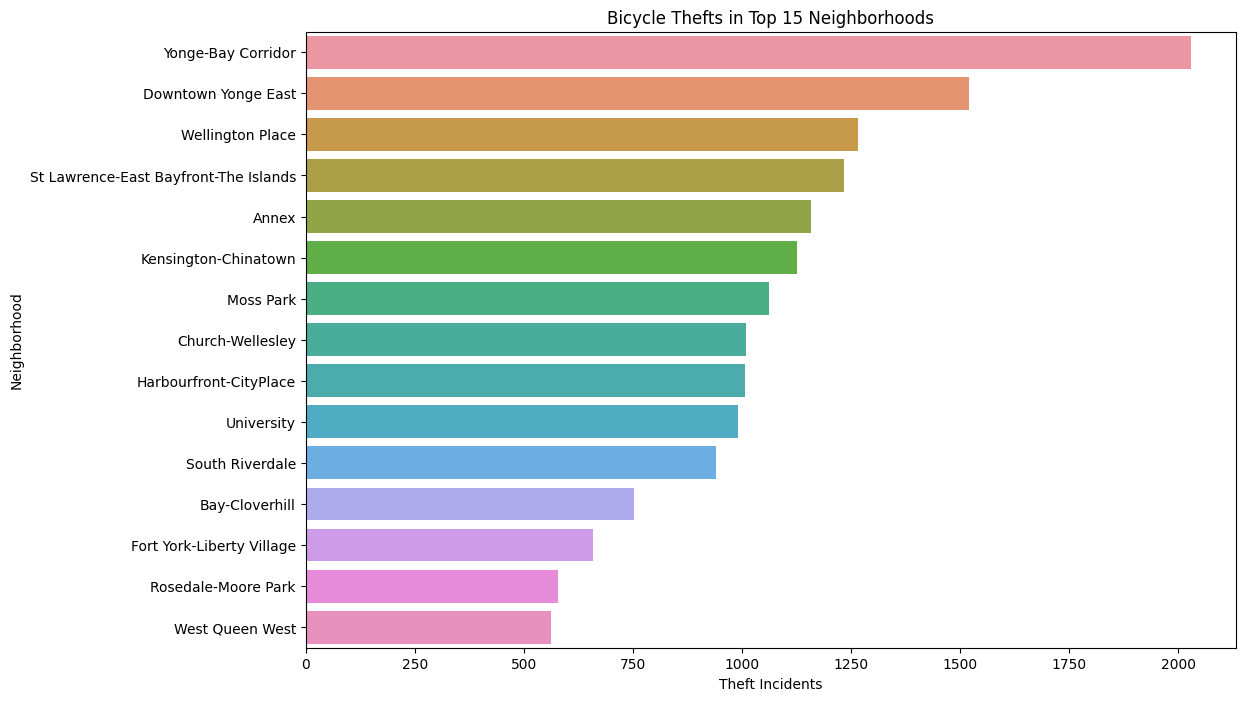

In [ ]:
# Map plot to visualize thefts in neighborhoods
plt.figure(figsize=(12, 8))
sns.countplot(y='NEIGHBOURHOOD_158', data=data, order=data['NEIGHBOURHOOD_158'].value_counts().index[:15])
plt.title('Bicycle Thefts in Top 15 Neighborhoods')
plt.xlabel('Theft Incidents')
plt.ylabel('Neighborhood')
plt.show()

Analysis:

Horizontal count plot showcasing bicycle thefts across the top 15 neighborhoods.
Provides an overview of theft incidents in different areas.
Conclusions:

Certain neighborhoods experience higher rates of bicycle theft.
Identification of areas requiring increased security measures.
Recommendations:

Implement targeted policing or surveillance in high-theft neighborhoods.
Community engagement to raise awareness and prevent thefts in these areas.


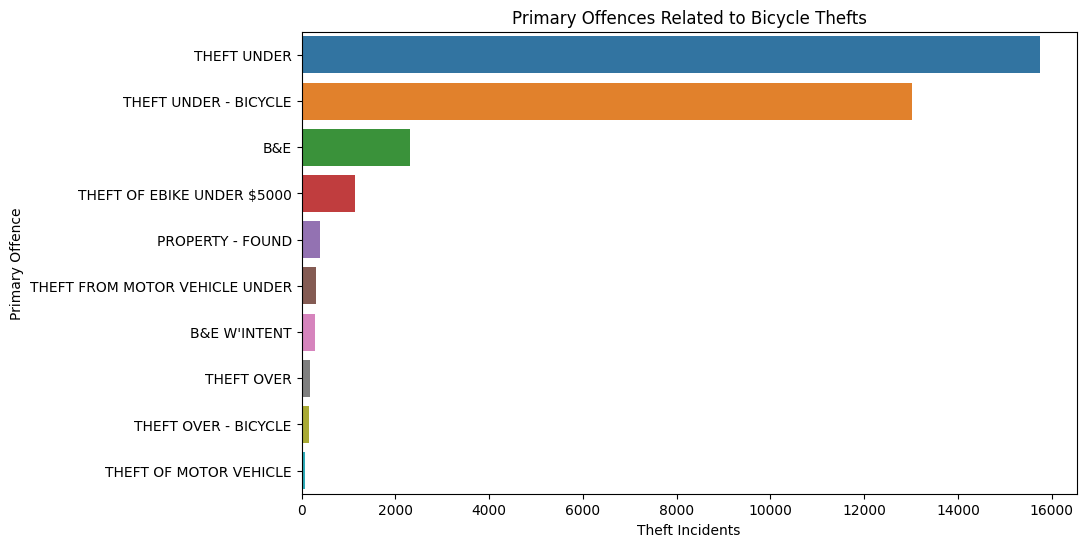

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='PRIMARY_OFFENCE', data=data, order=data['PRIMARY_OFFENCE'].value_counts().index[:10])
plt.title('Primary Offences Related to Bicycle Thefts')
plt.xlabel('Theft Incidents')
plt.ylabel('Primary Offence')
plt.show()



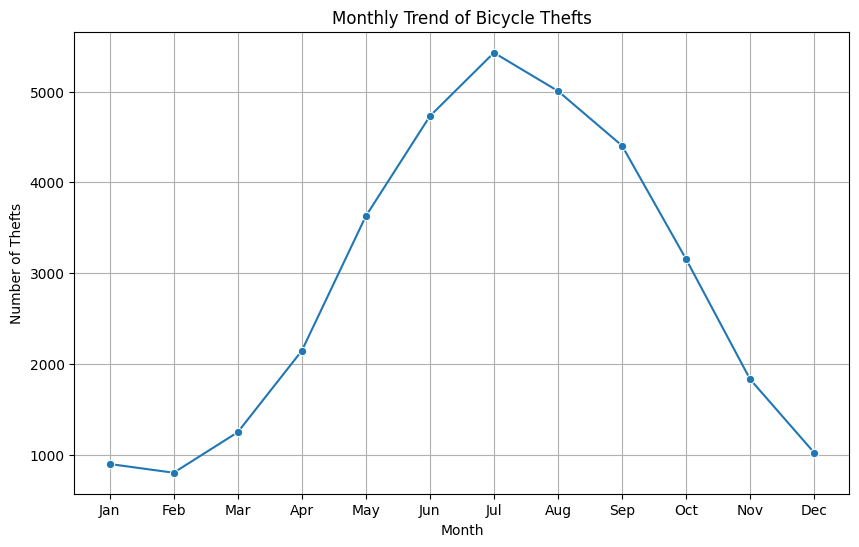

In [ ]:
#Temporal Analysis: Analyze temporal trends in bicycle thefts. Are there seasons or times of day when thefts are more frequent?# Convert 'OCC_DATE' to datetime format
data['OCC_DATE'] = pd.to_datetime(data['OCC_DATE'])
data['Month'] = data['OCC_DATE'].dt.month

monthly_thefts = data['Month'].value_counts().sort_index()

# Plotting the temporal trend of bicycle thefts by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_thefts.index, y=monthly_thefts.values, marker='o')
plt.title('Monthly Trend of Bicycle Thefts')
plt.xlabel('Month')
plt.ylabel('Number of Thefts')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Seasonal Impact: Certain months might exhibit higher theft rates, possibly influenced by factors like weather, holidays, or increased outdoor activities.
Hourly Insights: Understanding the distribution of thefts by hour could unveil specific timeframes vulnerable to theft, aiding in focused prevention strategies.
Seasonal Precautions: During months with increased theft rates, so especially during the summer, enhance surveillance and awareness campaigns.


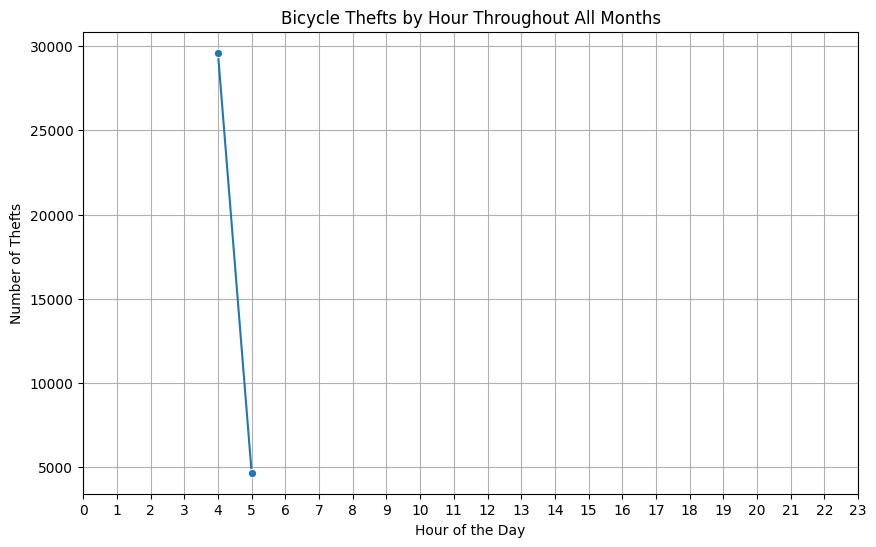

In [ ]:
data['OCC_DATE'] = pd.to_datetime(data['OCC_DATE'])

# Extract hour from 'OCC_DATE'
data['Hour'] = data['OCC_DATE'].dt.hour

# Count occurrences of bicycle thefts per hour throughout all months
hourly_thefts = data['Hour'].value_counts().sort_index()

# Plotting the temporal trend of bicycle thefts by hour across all months
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_thefts.index, y=hourly_thefts.values, marker='o')
plt.title('Bicycle Thefts by Hour Throughout All Months')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Thefts')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [ ]:
import folium
data = data.dropna(subset=['LAT_WGS84', 'LONG_WGS84'])

# Create a base map centered at the mean latitude and longitude
theft_map = folium.Map(location=[data['LAT_WGS84'].mean(), data['LONG_WGS84'].mean()], zoom_start=12)

# Add markers for each theft incident location with neighborhood information
for index, row in data.iterrows():
    popup_text = f"Neighborhood: {row['NEIGHBOURHOOD_140']}"  # Popup text with neighborhood info
    folium.Marker([row['LAT_WGS84'], row['LONG_WGS84']], popup=popup_text).add_to(theft_map)

# Display the map
theft_map

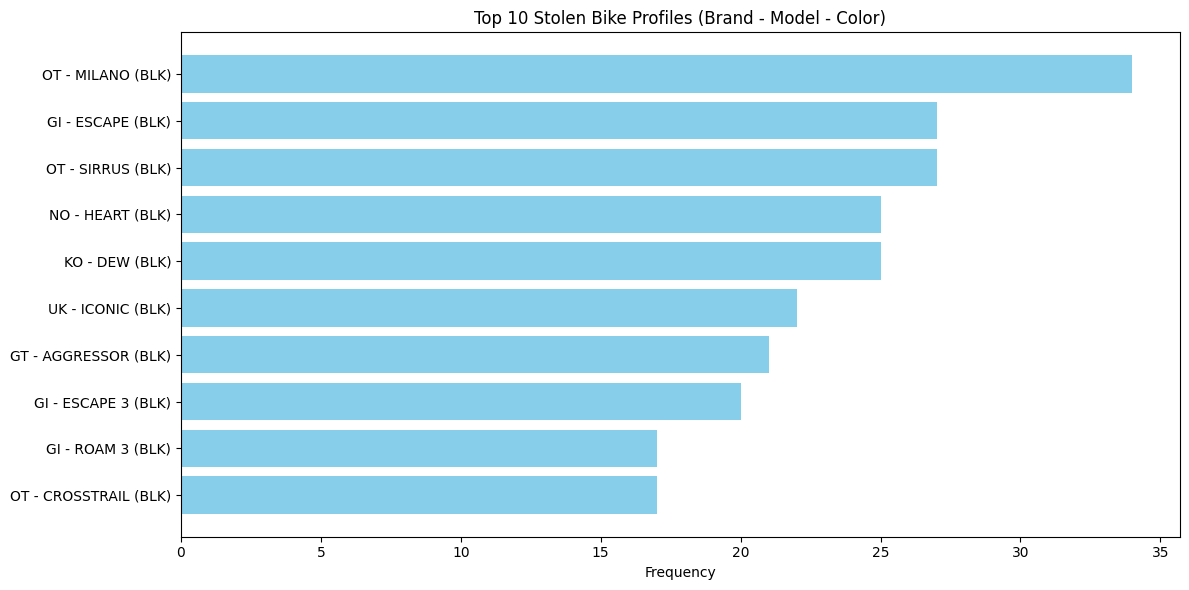

In [37]:
filtered_data = data.dropna(subset=['BIKE_MAKE', 'BIKE_MODEL', 'BIKE_COLOUR'])

# Group by bike brand, model, and color and count occurrences
bike_profiles = filtered_data.groupby(['BIKE_MAKE', 'BIKE_MODEL', 'BIKE_COLOUR']).size().reset_index(name='Frequency')

# Sort values by frequency in descending order
bike_profiles = bike_profiles.sort_values(by='Frequency', ascending=False).head(10)  # Display top 10

# Visualize the top 10 stolen bike profiles (brand, model, color)
plt.figure(figsize=(12, 6))
plt.barh(bike_profiles.apply(lambda x: f"{x['BIKE_MAKE']} - {x['BIKE_MODEL']} ({x['BIKE_COLOUR']})", axis=1),
         bike_profiles['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Stolen Bike Profiles (Brand - Model - Color)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent at the top
plt.tight_layout()
plt.show()

Understanding the detailed characteristics of stolen bikes—beyond just the brand or model—is crucial in identifying patterns and focusing preventive measures. The visualization helps in pinpointing specific bike profiles that require heightened attention for theft prevention strategies.
The most stolen Bike is black, Milano OT. It means we can also advise the owner of those bikes to be extra careful when parking their bike outside.

In [38]:
theft_data = data[['OCC_DATE', 'LAT_WGS84', 'LONG_WGS84']]

# Define a function to calculate distance between two points (latitude, longitude)
def calculate_distance(lat1, lon1, lat2, lon2):
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5

# Set a threshold distance for connections (adjust as needed)
threshold_distance = 0.01

# Create a dataframe to store potential connections between theft incidents
connections = pd.DataFrame(columns=['Incident_1', 'Incident_2'])

# Iterate through each theft incident to find potential connections
for i in range(len(theft_data)):
    for j in range(i+1, len(theft_data)):
        lat1, lon1 = theft_data.loc[i, 'LAT_WGS84'], theft_data.loc[i, 'LONG_WGS84']
        lat2, lon2 = theft_data.loc[j, 'LAT_WGS84'], theft_data.loc[j, 'LONG_WGS84']

        distance = calculate_distance(lat1, lon1, lat2, lon2)
        if distance <= threshold_distance:
            connections = connections.append({'Incident_1': i, 'Incident_2': j}, ignore_index=True)

# Visualize potential connections (simplified representation)
plt.figure(figsize=(10, 8))
plt.scatter(theft_data['LONG_WGS84'], theft_data['LAT_WGS84'], s=10, label='Theft Incidents')
for _, row in connections.iterrows():
    incident1 = theft_data.iloc[int(row['Incident_1'])]
    incident2 = theft_data.iloc[int(row['Incident_2'])]
    plt.plot([incident1['LONG_WGS84'], incident2['LONG_WGS84']], [incident1['LAT_WGS84'], incident2['LAT_WGS84']], c='red', alpha=0.5)
plt.title('Connections between Bicycle Theft Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
<ipython-input-38-673cf3750fbe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  connections = connections.append({'Incident_1': i, 'Incident_2': j}, ignore_index=True)
<ipython-input-38-673cf3750fbe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  connections = connections.append({'Incident_1': i, 'Incident_2': j}, ignore_index=True)
<ipython-input-38-673cf3750fbe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  connections = connections.append({'Incident_1': i, 'Incident_2': j}, ignore_index=True)
<ipython-input-38-673cf3750fbe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

KeyboardInterrupt: ignored

In [48]:
selected_columns = ['OCC_DATE', 'BIKE_COLOUR', 'Temperature', 'Precipitation', 'IsHoliday', 'TheftOccurrenceColumn']
data = data[selected_columns]
data['OCC_DATE'] = pd.to_datetime(data['OCC_DATE'])

# Convert 'OCC_DATE' to datetime format if it's not already in datetime
data['OCC_DATE'] = pd.to_datetime(data['OCC_DATE'])

# Check for correlation between columns
correlation_matrix = data.corr()

# Print correlation matrix
print(correlation_matrix)

KeyError: ignored